## Coupling of Mechanical Physical System with Artificial Neural Networks
##### Yashwant Kolluru 
##### <a href="mailto:yashwant.kolluru@gmail.com">yashwant.kolluru@gmail.com</a>



In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import regularizers

  

   #### Example 1. One-dimensional harmonic oscillator.

In [1]:
def Amplitude(omega, zeta): 
    """Analytic """
    A = 1/math.sqrt((1-omega**2)**2+(2*zeta*omega)**2)
    return A

zeta_0 = 0.2   
w_min = 0.0    
w_max = 50.0   
N_omega = 1000    

w = np.linspace(w_min, w_max, N_omega).reshape(-1, 1)

Amplitude = np.vectorize(Amplitude)
a = Amplitude(w, zeta_0)

mu_a = np.mean(a)
st_a = np.std(a)

astd = (a-mu_a)/st_a

rnd_indices = np.random.rand(len(w)) < 0.80
#print(rnd_indices)

x_train = w[rnd_indices]
y_train = astd[rnd_indices]
x_test = w[~rnd_indices]
y_test = astd[~rnd_indices]

#plt.hist(astd)
#print(len(x_train))

Using TensorFlow backend.


In [5]:
# Create a model
def baseline_model():
    height = 20
    model = Sequential()    
    model.add(Dense(height, input_dim=1, activation='sigmoid'))
    model.add(Dense(height, input_dim=height, activation='sigmoid'))
    model.add(Dense(height, input_dim=height, activation='sigmoid'))
    model.add(Dense(1, input_dim=height, activation='linear'))
    
    sgd = SGD(lr=0.001, momentum=0.9, nesterov=True)
    model.compile(loss='mse', optimizer="adam", metrics=["acc"])
    return model

# Training the model
model = baseline_model()
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, epochs=1000, verbose = 1, validation_data=(x_test,y_test))



Train on 763 samples, validate on 237 samples
Epoch 1/1000
763/763 [==============================] - 1s 1ms/step - loss: 1.1660 - acc: 0.0000e+00 - val_loss: 0.4120 - val_acc: 0.0000e+00
Epoch 2/1000
763/763 [==============================] - 0s 64us/step - loss: 1.1377 - acc: 0.0000e+00 - val_loss: 0.3776 - val_acc: 0.0000e+00
Epoch 3/1000
763/763 [==============================] - 0s 54us/step - loss: 1.1113 - acc: 0.0000e+00 - val_loss: 0.3670 - val_acc: 0.0000e+00
Epoch 4/1000
763/763 [==============================] - 0s 41us/step - loss: 1.0777 - acc: 0.0000e+00 - val_loss: 0.3464 - val_acc: 0.0000e+00
Epoch 5/1000
763/763 [==============================] - 0s 54us/step - loss: 1.0412 - acc: 0.0000e+00 - val_loss: 0.3333 - val_acc: 0.0000e+00
Epoch 6/1000
763/763 [==============================] - 0s 51us/step - loss: 1.0010 - acc: 0.0000e+00 - val_loss: 0.3028 - val_acc: 0.0000e+00
Epoch 7/1000
763/763 [==============================] - 0s 40us/step - loss: 0.9432 - acc: 0.00

Epoch 55/1000
763/763 [==============================] - 0s 30us/step - loss: 0.1855 - acc: 0.0000e+00 - val_loss: 0.0628 - val_acc: 0.0000e+00
Epoch 56/1000
763/763 [==============================] - 0s 29us/step - loss: 0.1842 - acc: 0.0000e+00 - val_loss: 0.0610 - val_acc: 0.0000e+00
Epoch 57/1000
763/763 [==============================] - 0s 29us/step - loss: 0.1829 - acc: 0.0000e+00 - val_loss: 0.0612 - val_acc: 0.0000e+00
Epoch 58/1000
763/763 [==============================] - 0s 35us/step - loss: 0.1829 - acc: 0.0000e+00 - val_loss: 0.0596 - val_acc: 0.0000e+00
Epoch 59/1000
763/763 [==============================] - 0s 28us/step - loss: 0.1823 - acc: 0.0000e+00 - val_loss: 0.0606 - val_acc: 0.0000e+00
Epoch 60/1000
763/763 [==============================] - 0s 31us/step - loss: 0.1817 - acc: 0.0000e+00 - val_loss: 0.0572 - val_acc: 0.0000e+00
Epoch 61/1000
763/763 [==============================] - 0s 34us/step - loss: 0.1804 - acc: 0.0000e+00 - val_loss: 0.0589 - val_acc: 0.0

763/763 [==============================] - 0s 30us/step - loss: 0.1304 - acc: 0.0000e+00 - val_loss: 0.0336 - val_acc: 0.0000e+00
Epoch 168/1000
763/763 [==============================] - 0s 30us/step - loss: 0.1296 - acc: 0.0000e+00 - val_loss: 0.0350 - val_acc: 0.0000e+00
Epoch 169/1000
763/763 [==============================] - 0s 30us/step - loss: 0.1289 - acc: 0.0000e+00 - val_loss: 0.0349 - val_acc: 0.0000e+00
Epoch 170/1000
763/763 [==============================] - 0s 28us/step - loss: 0.1289 - acc: 0.0000e+00 - val_loss: 0.0346 - val_acc: 0.0000e+00
Epoch 171/1000
763/763 [==============================] - 0s 29us/step - loss: 0.1289 - acc: 0.0000e+00 - val_loss: 0.0343 - val_acc: 0.0000e+00
Epoch 172/1000
763/763 [==============================] - 0s 29us/step - loss: 0.1285 - acc: 0.0000e+00 - val_loss: 0.0336 - val_acc: 0.0000e+00
Epoch 173/1000
763/763 [==============================] - 0s 26us/step - loss: 0.1276 - acc: 0.0000e+00 - val_loss: 0.0354 - val_acc: 0.0000e+00


763/763 [==============================] - 0s 30us/step - loss: 0.0224 - acc: 0.0000e+00 - val_loss: 0.0071 - val_acc: 0.0000e+00
Epoch 280/1000
763/763 [==============================] - 0s 30us/step - loss: 0.0218 - acc: 0.0000e+00 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 281/1000
763/763 [==============================] - 0s 30us/step - loss: 0.0214 - acc: 0.0000e+00 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 282/1000
763/763 [==============================] - 0s 28us/step - loss: 0.0210 - acc: 0.0000e+00 - val_loss: 0.0067 - val_acc: 0.0000e+00
Epoch 283/1000
763/763 [==============================] - 0s 28us/step - loss: 0.0203 - acc: 0.0000e+00 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 284/1000
763/763 [==============================] - 0s 30us/step - loss: 0.0198 - acc: 0.0000e+00 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 285/1000
763/763 [==============================] - 0s 28us/step - loss: 0.0196 - acc: 0.0000e+00 - val_loss: 0.0064 - val_acc: 0.0000e+00


763/763 [==============================] - 0s 35us/step - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.8907e-04 - val_acc: 0.0000e+00
Epoch 392/1000
763/763 [==============================] - 0s 29us/step - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 393/1000
763/763 [==============================] - 0s 26us/step - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 394/1000
763/763 [==============================] - 0s 33us/step - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 9.6876e-04 - val_acc: 0.0000e+00
Epoch 395/1000
763/763 [==============================] - 0s 33us/step - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.9695e-04 - val_acc: 0.0000e+00
Epoch 396/1000
763/763 [==============================] - 0s 29us/step - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.6928e-04 - val_acc: 0.0000e+00
Epoch 397/1000
763/763 [==============================] - 0s 29us/step - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 9.7375e-04 - 

Epoch 500/1000
763/763 [==============================] - 0s 37us/step - loss: 3.7921e-04 - acc: 0.0000e+00 - val_loss: 1.9563e-04 - val_acc: 0.0000e+00
Epoch 501/1000
763/763 [==============================] - 0s 29us/step - loss: 3.6669e-04 - acc: 0.0000e+00 - val_loss: 1.9175e-04 - val_acc: 0.0000e+00
Epoch 502/1000
763/763 [==============================] - 0s 28us/step - loss: 3.9078e-04 - acc: 0.0000e+00 - val_loss: 1.7542e-04 - val_acc: 0.0000e+00
Epoch 503/1000
763/763 [==============================] - 0s 31us/step - loss: 3.7005e-04 - acc: 0.0000e+00 - val_loss: 1.7844e-04 - val_acc: 0.0000e+00
Epoch 504/1000
763/763 [==============================] - 0s 29us/step - loss: 3.6102e-04 - acc: 0.0000e+00 - val_loss: 1.8038e-04 - val_acc: 0.0000e+00
Epoch 505/1000
763/763 [==============================] - 0s 30us/step - loss: 3.4435e-04 - acc: 0.0000e+00 - val_loss: 1.6207e-04 - val_acc: 0.0000e+00
Epoch 506/1000
763/763 [==============================] - 0s 28us/step - loss: 3.7

763/763 [==============================] - 0s 28us/step - loss: 4.8973e-05 - acc: 0.0000e+00 - val_loss: 3.6371e-05 - val_acc: 0.0000e+00
Epoch 607/1000
763/763 [==============================] - 0s 28us/step - loss: 5.1589e-05 - acc: 0.0000e+00 - val_loss: 1.9314e-05 - val_acc: 0.0000e+00
Epoch 608/1000
763/763 [==============================] - 0s 29us/step - loss: 7.4293e-05 - acc: 0.0000e+00 - val_loss: 1.0659e-04 - val_acc: 0.0000e+00
Epoch 609/1000
763/763 [==============================] - 0s 30us/step - loss: 9.5494e-05 - acc: 0.0000e+00 - val_loss: 2.7502e-05 - val_acc: 0.0000e+00
Epoch 610/1000
763/763 [==============================] - 0s 27us/step - loss: 4.9218e-05 - acc: 0.0000e+00 - val_loss: 1.5374e-05 - val_acc: 0.0000e+00
Epoch 611/1000
763/763 [==============================] - 0s 29us/step - loss: 4.3772e-05 - acc: 0.0000e+00 - val_loss: 1.4387e-05 - val_acc: 0.0000e+00
Epoch 612/1000
763/763 [==============================] - 0s 27us/step - loss: 5.7370e-05 - acc: 

Epoch 713/1000
763/763 [==============================] - 0s 28us/step - loss: 2.7748e-05 - acc: 0.0000e+00 - val_loss: 1.3685e-05 - val_acc: 0.0000e+00
Epoch 714/1000
763/763 [==============================] - 0s 30us/step - loss: 2.9551e-05 - acc: 0.0000e+00 - val_loss: 1.8107e-05 - val_acc: 0.0000e+00
Epoch 715/1000
763/763 [==============================] - 0s 27us/step - loss: 3.3866e-05 - acc: 0.0000e+00 - val_loss: 2.5177e-05 - val_acc: 0.0000e+00
Epoch 716/1000
763/763 [==============================] - 0s 30us/step - loss: 3.0607e-05 - acc: 0.0000e+00 - val_loss: 1.4410e-05 - val_acc: 0.0000e+00
Epoch 717/1000
763/763 [==============================] - 0s 30us/step - loss: 2.0810e-05 - acc: 0.0000e+00 - val_loss: 1.2984e-05 - val_acc: 0.0000e+00
Epoch 718/1000
763/763 [==============================] - 0s 30us/step - loss: 2.6674e-05 - acc: 0.0000e+00 - val_loss: 1.6266e-05 - val_acc: 0.0000e+00
Epoch 719/1000
763/763 [==============================] - 0s 29us/step - loss: 2.9

763/763 [==============================] - 0s 28us/step - loss: 3.9776e-05 - acc: 0.0000e+00 - val_loss: 2.1235e-05 - val_acc: 0.0000e+00
Epoch 820/1000
763/763 [==============================] - 0s 30us/step - loss: 4.0940e-05 - acc: 0.0000e+00 - val_loss: 2.4919e-05 - val_acc: 0.0000e+00
Epoch 821/1000
763/763 [==============================] - 0s 29us/step - loss: 4.1464e-05 - acc: 0.0000e+00 - val_loss: 1.7045e-05 - val_acc: 0.0000e+00
Epoch 822/1000
763/763 [==============================] - 0s 29us/step - loss: 9.3169e-05 - acc: 0.0000e+00 - val_loss: 8.7738e-05 - val_acc: 0.0000e+00
Epoch 823/1000
763/763 [==============================] - 0s 28us/step - loss: 9.8906e-05 - acc: 0.0000e+00 - val_loss: 8.9123e-05 - val_acc: 0.0000e+00
Epoch 824/1000
763/763 [==============================] - 0s 31us/step - loss: 8.0927e-05 - acc: 0.0000e+00 - val_loss: 5.4521e-05 - val_acc: 0.0000e+00
Epoch 825/1000
763/763 [==============================] - 0s 29us/step - loss: 2.7341e-05 - acc: 

763/763 [==============================] - 0s 31us/step - loss: 1.4535e-05 - acc: 0.0000e+00 - val_loss: 8.9346e-06 - val_acc: 0.0000e+00
Epoch 926/1000
763/763 [==============================] - 0s 33us/step - loss: 2.0459e-05 - acc: 0.0000e+00 - val_loss: 1.0742e-05 - val_acc: 0.0000e+00
Epoch 927/1000
763/763 [==============================] - 0s 28us/step - loss: 1.5728e-05 - acc: 0.0000e+00 - val_loss: 1.2186e-05 - val_acc: 0.0000e+00
Epoch 928/1000
763/763 [==============================] - 0s 30us/step - loss: 1.5233e-05 - acc: 0.0000e+00 - val_loss: 8.8191e-06 - val_acc: 0.0000e+00
Epoch 929/1000
763/763 [==============================] - 0s 28us/step - loss: 1.5049e-05 - acc: 0.0000e+00 - val_loss: 1.0542e-05 - val_acc: 0.0000e+00
Epoch 930/1000
763/763 [==============================] - 0s 29us/step - loss: 2.0000e-05 - acc: 0.0000e+00 - val_loss: 1.4739e-05 - val_acc: 0.0000e+00
Epoch 931/1000
763/763 [==============================] - 0s 30us/step - loss: 2.3607e-05 - acc: 

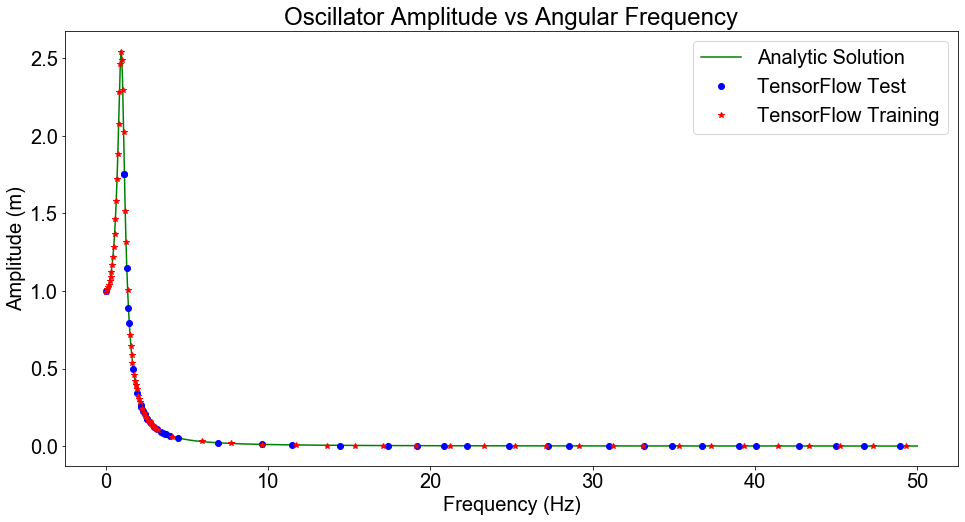

In [7]:
# normal scale without normilization
plt.figure(figsize=(16,8))
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "20"

#model.predict(x_train)*st_a+mu_a

dummy_xtest1= x_test[0:20:1]
dummy_xtest2 = x_test[1::10]
dummy_xtest= np.concatenate((dummy_xtest1, dummy_xtest2), axis=None)

dummy_xtrain1= x_train[0:50:1]
dummy_xtrain2 = x_train[1::30]
dummy_xtrain= np.concatenate((dummy_xtrain1, dummy_xtrain2), axis=None)


plt.plot(w, a, 'g')
plt.plot(dummy_xtest, model.predict(dummy_xtest)*st_a+mu_a, 'ob')
plt.plot(dummy_xtrain, model.predict(dummy_xtrain)*st_a+mu_a, 'r*')


plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (m)')

plt.title('Oscillator Amplitude vs Angular Frequency')
plt.legend(['Analytic Solution','TensorFlow Test', 'TensorFlow Training'])
plt.show()

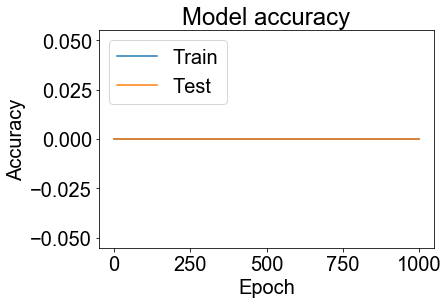

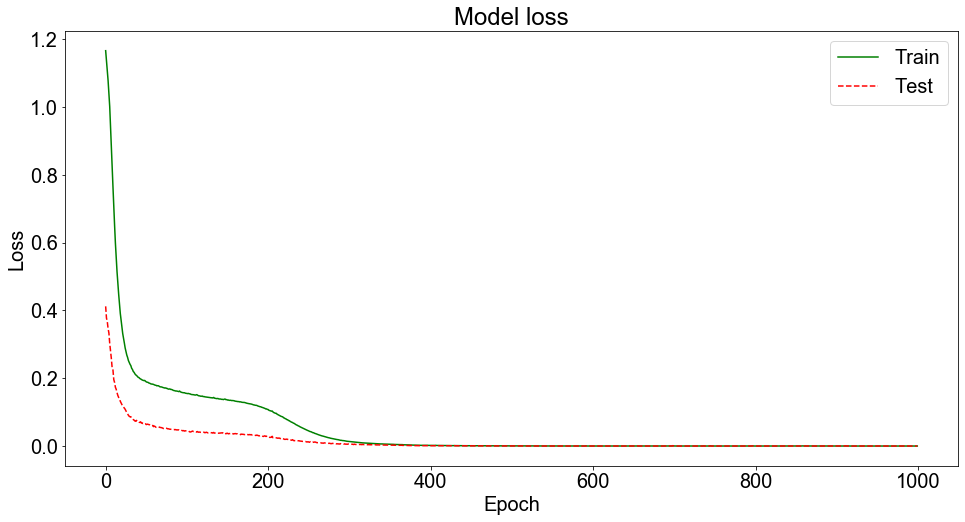

In [8]:
#history1 = model.fit(x_train, y_train, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.figure(figsize=(16,8))
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "20"
# Plot training & validation loss values
plt.plot(model.history.history['loss'], 'g')
plt.plot(model.history.history['val_loss'], 'r--')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

   #### Example 2. 2-D beam under the harmonically varying load.

In [7]:
f =  pd.read_excel('Examples.xlsx', sheet_name="Beam", usecols="A",header=None)
u =  pd.read_excel('Examples.xlsx', sheet_name="Beam", usecols="B:C",header=None)

#print(u)

In [8]:
rnd_indices = np.random.rand(len(f)) < 0.95

x_train = f[rnd_indices]
y_train = u[rnd_indices]
x_test = f[~rnd_indices]
y_test = u[~rnd_indices]

#plt.hist(u)
#plt.figure()
#plt.plot(u)
#rnd_indices = np.random.rand(len(f)) < 0.95
#print(len(rnd_indices))
#print(len(x_test))
#print(u)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 102       
Total params: 5,302
Trainable params: 5,302
Non-trainable params: 0
_________________________________________________________________


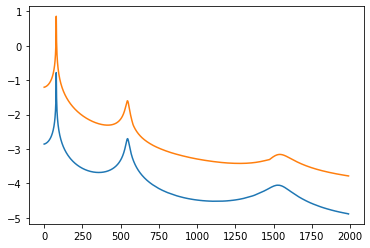

In [9]:

def baseline_model():
    model = Sequential()
    height = 50
    model.add(Dense(height, input_dim=1, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(2, input_dim=height, activation='linear', kernel_initializer='normal'))
    
    sgd = SGD(lr=0.001, momentum=0.9, nesterov=True)
    model.compile(loss='mse', optimizer="adam" , metrics=["acc"])
    return model

# Training the model
model = baseline_model()
model.summary()

v = np.log10(u)
plt.plot(v)

In [10]:
model.fit(f, v, epochs=1000, verbose = 1, validation_data=(x_test,np.log10(y_test)))

Train on 1990 samples, validate on 113 samples
Epoch 1/1000
1990/1990 [==============================] - 1s 349us/step - loss: 4.0641 - acc: 1.0000 - val_loss: 0.4333 - val_acc: 1.0000
Epoch 2/1000
1990/1990 [==============================] - 0s 74us/step - loss: 0.3593 - acc: 1.0000 - val_loss: 0.2502 - val_acc: 1.0000
Epoch 3/1000
1990/1990 [==============================] - 0s 55us/step - loss: 0.1467 - acc: 1.0000 - val_loss: 0.1340 - val_acc: 1.0000
Epoch 4/1000
1990/1990 [==============================] - 0s 48us/step - loss: 0.1068 - acc: 1.0000 - val_loss: 0.1136 - val_acc: 1.0000
Epoch 5/1000
1990/1990 [==============================] - 0s 46us/step - loss: 0.0968 - acc: 1.0000 - val_loss: 0.1068 - val_acc: 1.0000
Epoch 6/1000
1990/1990 [==============================] - 0s 46us/step - loss: 0.0840 - acc: 1.0000 - val_loss: 0.0803 - val_acc: 1.0000
Epoch 7/1000
1990/1990 [==============================] - 0s 47us/step - loss: 0.0832 - acc: 1.0000 - val_loss: 0.0749 - val_acc: 

1990/1990 [==============================] - 0s 52us/step - loss: 0.0603 - acc: 1.0000 - val_loss: 0.0530 - val_acc: 1.0000
Epoch 61/1000
1990/1990 [==============================] - 0s 43us/step - loss: 0.0636 - acc: 1.0000 - val_loss: 0.0505 - val_acc: 1.0000
Epoch 62/1000
1990/1990 [==============================] - 0s 44us/step - loss: 0.0591 - acc: 1.0000 - val_loss: 0.0502 - val_acc: 1.0000
Epoch 63/1000
1990/1990 [==============================] - 0s 43us/step - loss: 0.0603 - acc: 1.0000 - val_loss: 0.0491 - val_acc: 1.0000
Epoch 64/1000
1990/1990 [==============================] - 0s 44us/step - loss: 0.0593 - acc: 1.0000 - val_loss: 0.0477 - val_acc: 1.0000
Epoch 65/1000
1990/1990 [==============================] - 0s 42us/step - loss: 0.0546 - acc: 1.0000 - val_loss: 0.0463 - val_acc: 1.0000
Epoch 66/1000
1990/1990 [==============================] - 0s 46us/step - loss: 0.0541 - acc: 1.0000 - val_loss: 0.0431 - val_acc: 1.0000
Epoch 67/1000
1990/1990 [=======================

1990/1990 [==============================] - 0s 50us/step - loss: 0.0276 - acc: 1.0000 - val_loss: 0.0286 - val_acc: 1.0000
Epoch 120/1000
1990/1990 [==============================] - 0s 42us/step - loss: 0.0276 - acc: 1.0000 - val_loss: 0.0233 - val_acc: 1.0000
Epoch 121/1000
1990/1990 [==============================] - 0s 44us/step - loss: 0.0292 - acc: 1.0000 - val_loss: 0.0212 - val_acc: 1.0000
Epoch 122/1000
1990/1990 [==============================] - 0s 42us/step - loss: 0.0264 - acc: 1.0000 - val_loss: 0.0197 - val_acc: 1.0000
Epoch 123/1000
1990/1990 [==============================] - 0s 44us/step - loss: 0.0277 - acc: 1.0000 - val_loss: 0.0186 - val_acc: 1.0000
Epoch 124/1000
1990/1990 [==============================] - 0s 42us/step - loss: 0.0293 - acc: 1.0000 - val_loss: 0.0234 - val_acc: 1.0000
Epoch 125/1000
1990/1990 [==============================] - 0s 43us/step - loss: 0.0290 - acc: 1.0000 - val_loss: 0.0196 - val_acc: 1.0000
Epoch 126/1000
1990/1990 [================

1990/1990 [==============================] - 0s 53us/step - loss: 0.0142 - acc: 1.0000 - val_loss: 0.0206 - val_acc: 1.0000
Epoch 179/1000
1990/1990 [==============================] - 0s 46us/step - loss: 0.0155 - acc: 1.0000 - val_loss: 0.0106 - val_acc: 1.0000
Epoch 180/1000
1990/1990 [==============================] - 0s 45us/step - loss: 0.0121 - acc: 1.0000 - val_loss: 0.0095 - val_acc: 1.0000
Epoch 181/1000
1990/1990 [==============================] - 0s 46us/step - loss: 0.0135 - acc: 1.0000 - val_loss: 0.0084 - val_acc: 1.0000
Epoch 182/1000
1990/1990 [==============================] - 0s 45us/step - loss: 0.0133 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 1.0000
Epoch 183/1000
1990/1990 [==============================] - 0s 48us/step - loss: 0.0111 - acc: 1.0000 - val_loss: 0.0109 - val_acc: 1.0000
Epoch 184/1000
1990/1990 [==============================] - 0s 46us/step - loss: 0.0136 - acc: 1.0000 - val_loss: 0.0138 - val_acc: 1.0000
Epoch 185/1000
1990/1990 [================

1990/1990 [==============================] - 0s 45us/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 238/1000
1990/1990 [==============================] - 0s 43us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 0.0093 - val_acc: 1.0000
Epoch 239/1000
1990/1990 [==============================] - 0s 41us/step - loss: 0.0092 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 240/1000
1990/1990 [==============================] - 0s 42us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 241/1000
1990/1990 [==============================] - 0s 44us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 242/1000
1990/1990 [==============================] - 0s 45us/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 243/1000
1990/1990 [==============================] - 0s 43us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 0.0091 - val_acc: 1.0000
Epoch 244/1000
1990/1990 [================

Epoch 296/1000
1990/1990 [==============================] - 0s 44us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 297/1000
1990/1990 [==============================] - 0s 54us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 6.9726e-04 - val_acc: 1.0000
Epoch 298/1000
1990/1990 [==============================] - 0s 43us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 299/1000
1990/1990 [==============================] - 0s 42us/step - loss: 0.0052 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 300/1000
1990/1990 [==============================] - 0s 46us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 301/1000
1990/1990 [==============================] - 0s 43us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 302/1000
1990/1990 [==============================] - 0s 43us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 303/1000
1990/199

Epoch 355/1000
1990/1990 [==============================] - 0s 50us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 356/1000
1990/1990 [==============================] - 0s 46us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 357/1000
1990/1990 [==============================] - 0s 43us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 358/1000
1990/1990 [==============================] - 0s 49us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 359/1000
1990/1990 [==============================] - 0s 59us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 360/1000
1990/1990 [==============================] - 0s 65us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 6.6230e-04 - val_acc: 1.0000
Epoch 361/1000
1990/1990 [==============================] - 0s 45us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 6.2719e-04 - val_acc: 1.0000
Epoch 362/1000
1990

1990/1990 [==============================] - 0s 51us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 414/1000
1990/1990 [==============================] - 0s 43us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 5.5749e-04 - val_acc: 1.0000
Epoch 415/1000
1990/1990 [==============================] - 0s 48us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 1.0000
Epoch 416/1000
1990/1990 [==============================] - 0s 44us/step - loss: 0.0105 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 417/1000
1990/1990 [==============================] - 0s 43us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 7.6157e-04 - val_acc: 1.0000
Epoch 418/1000
1990/1990 [==============================] - 0s 43us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 419/1000
1990/1990 [==============================] - 0s 45us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 6.1704e-04 - val_acc: 1.0000
Epoch 420/1000
1990/1990 [====

1990/1990 [==============================] - 0s 49us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0119 - val_acc: 1.0000
Epoch 472/1000
1990/1990 [==============================] - 0s 44us/step - loss: 0.0157 - acc: 1.0000 - val_loss: 0.0168 - val_acc: 1.0000
Epoch 473/1000
1990/1990 [==============================] - 0s 42us/step - loss: 0.0101 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 474/1000
1990/1990 [==============================] - 0s 44us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 475/1000
1990/1990 [==============================] - 0s 43us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 4.6813e-04 - val_acc: 1.0000
Epoch 476/1000
1990/1990 [==============================] - 0s 45us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 477/1000
1990/1990 [==============================] - 0s 44us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 6.4495e-04 - val_acc: 1.0000
Epoch 478/1000
1990/1990 [========

1990/1990 [==============================] - 0s 45us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 9.3038e-04 - val_acc: 1.0000
Epoch 530/1000
1990/1990 [==============================] - 0s 43us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 531/1000
1990/1990 [==============================] - 0s 47us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 0.0242 - val_acc: 1.0000
Epoch 532/1000
1990/1990 [==============================] - 0s 47us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 533/1000
1990/1990 [==============================] - 0s 45us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 534/1000
1990/1990 [==============================] - 0s 43us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 5.9528e-04 - val_acc: 1.0000
Epoch 535/1000
1990/1990 [==============================] - 0s 43us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 9.2181e-04 - val_acc: 1.0000
Epoch 536/1000
1990/1990 [====

1990/1990 [==============================] - 0s 48us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 8.2645e-04 - val_acc: 1.0000
Epoch 588/1000
1990/1990 [==============================] - 0s 45us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 5.1713e-04 - val_acc: 1.0000
Epoch 589/1000
1990/1990 [==============================] - 0s 45us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 590/1000
1990/1990 [==============================] - 0s 44us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 591/1000
1990/1990 [==============================] - 0s 44us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 9.6693e-04 - val_acc: 1.0000
Epoch 592/1000
1990/1990 [==============================] - 0s 45us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 1.0000
Epoch 593/1000
1990/1990 [==============================] - 0s 44us/step - loss: 0.0092 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 594/1000
1990/1990 [====

1990/1990 [==============================] - 0s 50us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 646/1000
1990/1990 [==============================] - 0s 46us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0044 - val_acc: 1.0000
Epoch 647/1000
1990/1990 [==============================] - 0s 42us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 8.9830e-04 - val_acc: 1.0000
Epoch 648/1000
1990/1990 [==============================] - 0s 47us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 7.2027e-04 - val_acc: 1.0000
Epoch 649/1000
1990/1990 [==============================] - 0s 46us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 650/1000
1990/1990 [==============================] - 0s 47us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 651/1000
1990/1990 [==============================] - 0s 44us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 7.9159e-04 - val_acc: 1.0000
Epoch 652/1000
1990/1990 [====

1990/1990 [==============================] - 0s 46us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 4.8607e-04 - val_acc: 1.0000
Epoch 704/1000
1990/1990 [==============================] - 0s 45us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 705/1000
1990/1990 [==============================] - 0s 44us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 706/1000
1990/1990 [==============================] - 0s 45us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 5.9109e-04 - val_acc: 1.0000
Epoch 707/1000
1990/1990 [==============================] - 0s 43us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000
Epoch 708/1000
1990/1990 [==============================] - 0s 45us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 709/1000
1990/1990 [==============================] - 0s 54us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 710/1000
1990/1990 [========

1990/1990 [==============================] - 0s 47us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 762/1000
1990/1990 [==============================] - 0s 43us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 763/1000
1990/1990 [==============================] - 0s 44us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 764/1000
1990/1990 [==============================] - 0s 45us/step - loss: 6.6990e-04 - acc: 1.0000 - val_loss: 2.5573e-04 - val_acc: 1.0000
Epoch 765/1000
1990/1990 [==============================] - 0s 48us/step - loss: 8.4204e-04 - acc: 1.0000 - val_loss: 3.4180e-04 - val_acc: 1.0000
Epoch 766/1000
1990/1990 [==============================] - 0s 43us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 767/1000
1990/1990 [==============================] - 0s 47us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 768/1000
1990/1990 [

1990/1990 [==============================] - 0s 46us/step - loss: 8.0517e-04 - acc: 1.0000 - val_loss: 1.9033e-04 - val_acc: 1.0000
Epoch 819/1000
1990/1990 [==============================] - 0s 44us/step - loss: 6.0664e-04 - acc: 1.0000 - val_loss: 7.5960e-04 - val_acc: 1.0000
Epoch 820/1000
1990/1990 [==============================] - 0s 44us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 821/1000
1990/1990 [==============================] - 0s 44us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 822/1000
1990/1990 [==============================] - 0s 48us/step - loss: 9.1291e-04 - acc: 1.0000 - val_loss: 3.6120e-04 - val_acc: 1.0000
Epoch 823/1000
1990/1990 [==============================] - 0s 45us/step - loss: 7.8848e-04 - acc: 1.0000 - val_loss: 6.8488e-04 - val_acc: 1.0000
Epoch 824/1000
1990/1990 [==============================] - 0s 45us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 8.6256e-04 - val_acc: 1.0000
Epoch 

Epoch 875/1000
1990/1990 [==============================] - 0s 46us/step - loss: 7.7525e-04 - acc: 1.0000 - val_loss: 4.2742e-04 - val_acc: 1.0000
Epoch 876/1000
1990/1990 [==============================] - 0s 45us/step - loss: 9.2348e-04 - acc: 1.0000 - val_loss: 2.1935e-04 - val_acc: 1.0000
Epoch 877/1000
1990/1990 [==============================] - 0s 46us/step - loss: 5.5818e-04 - acc: 1.0000 - val_loss: 2.9893e-04 - val_acc: 1.0000
Epoch 878/1000
1990/1990 [==============================] - 0s 42us/step - loss: 3.7311e-04 - acc: 1.0000 - val_loss: 9.7119e-04 - val_acc: 1.0000
Epoch 879/1000
1990/1990 [==============================] - 0s 43us/step - loss: 7.7645e-04 - acc: 1.0000 - val_loss: 6.9174e-04 - val_acc: 1.0000
Epoch 880/1000
1990/1990 [==============================] - 0s 46us/step - loss: 5.2561e-04 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 881/1000
1990/1990 [==============================] - 0s 47us/step - loss: 9.4263e-04 - acc: 1.0000 - val_loss: 0.00

Epoch 932/1000
1990/1990 [==============================] - 0s 48us/step - loss: 5.9837e-04 - acc: 1.0000 - val_loss: 2.4546e-04 - val_acc: 1.0000
Epoch 933/1000
1990/1990 [==============================] - 0s 46us/step - loss: 8.4675e-04 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 934/1000
1990/1990 [==============================] - 0s 45us/step - loss: 5.4895e-04 - acc: 1.0000 - val_loss: 3.6708e-04 - val_acc: 1.0000
Epoch 935/1000
1990/1990 [==============================] - 0s 44us/step - loss: 4.2020e-04 - acc: 1.0000 - val_loss: 4.8535e-04 - val_acc: 1.0000
Epoch 936/1000
1990/1990 [==============================] - 0s 51us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0080 - val_acc: 1.0000
Epoch 937/1000
1990/1990 [==============================] - 0s 82us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 3.2700e-04 - val_acc: 1.0000
Epoch 938/1000
1990/1990 [==============================] - 0s 78us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.

Epoch 989/1000
1990/1990 [==============================] - 0s 47us/step - loss: 8.2974e-04 - acc: 1.0000 - val_loss: 4.5301e-04 - val_acc: 1.0000
Epoch 990/1000
1990/1990 [==============================] - 0s 43us/step - loss: 4.5265e-04 - acc: 1.0000 - val_loss: 3.8563e-04 - val_acc: 1.0000
Epoch 991/1000
1990/1990 [==============================] - 0s 51us/step - loss: 7.5306e-04 - acc: 1.0000 - val_loss: 2.8698e-04 - val_acc: 1.0000
Epoch 992/1000
1990/1990 [==============================] - 0s 45us/step - loss: 4.4402e-04 - acc: 1.0000 - val_loss: 1.2179e-04 - val_acc: 1.0000
Epoch 993/1000
1990/1990 [==============================] - 0s 44us/step - loss: 2.2911e-04 - acc: 1.0000 - val_loss: 2.7242e-04 - val_acc: 1.0000
Epoch 994/1000
1990/1990 [==============================] - 0s 45us/step - loss: 3.9537e-04 - acc: 1.0000 - val_loss: 3.3908e-04 - val_acc: 1.0000
Epoch 995/1000
1990/1990 [==============================] - 0s 45us/step - loss: 0.0060 - acc: 1.0000 - val_loss: 0.00

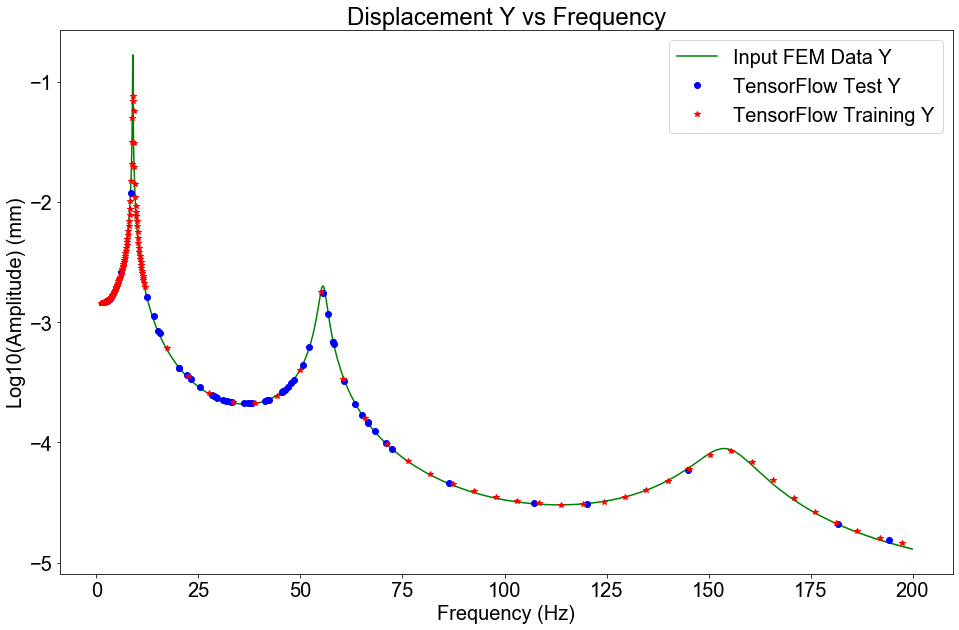

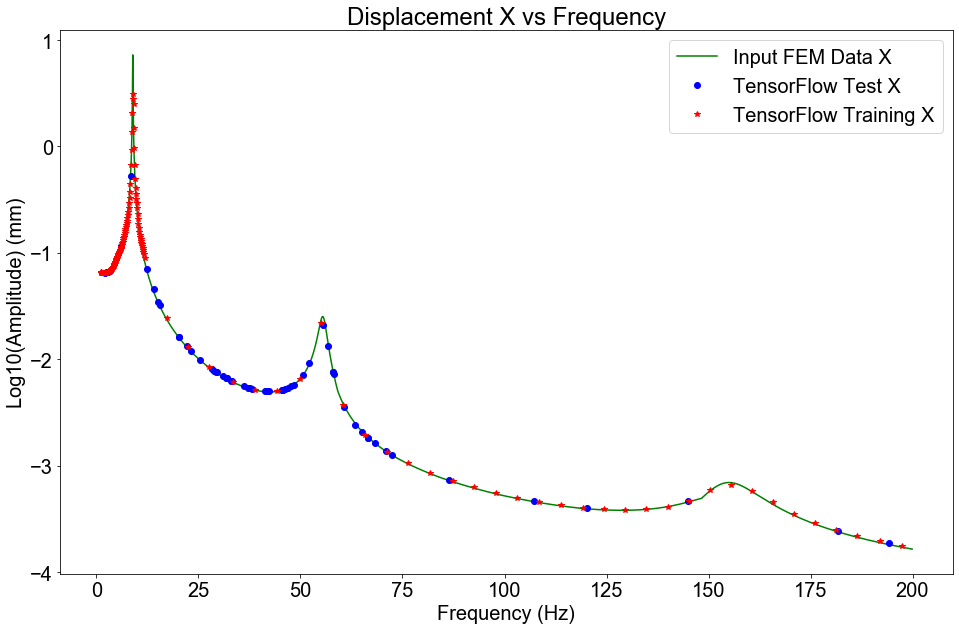

In [11]:
plt.figure(figsize=(16,10))
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "20"

dummy_xtrain1= x_train[0:100:1]
dummy_xtrain2 = x_train[1::50]
dummy_xtrain= np.concatenate((dummy_xtrain1, dummy_xtrain2), axis=None)

dummy_xtest1= x_test[0:50:1]
dummy_xtest2 = x_test[1::10]
dummy_xtest= np.concatenate((dummy_xtest1, dummy_xtest2), axis=None)
#print(dummy_xtest1)

v2=v.to_numpy()
dummy_xtest2=dummy_xtest
dummy_xtrain2=dummy_xtrain
#print(model.predict(dummy_xtest2)[:,1])

#######################################
plt.plot(f, v2[:,0], 'g')
plt.plot(dummy_xtest2, model.predict(dummy_xtest2)[:,0], 'ob')
plt.plot(dummy_xtrain2, model.predict(dummy_xtrain2)[:,0], 'r*')

plt.title('Displacement Y vs Frequency')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Log10(Amplitude) (mm)')
plt.legend(['Input FEM Data Y',
            'TensorFlow Test Y',
            'TensorFlow Training Y'])
plt.show()
#######################################

plt.figure(figsize=(16,10))
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "20"
plt.plot(f, v2[:,1], 'g')
plt.plot(dummy_xtest2, model.predict(dummy_xtest2)[:,1], 'ob')
plt.plot(dummy_xtrain2, model.predict(dummy_xtrain2)[:,1], 'r*')

plt.title('Displacement X vs Frequency')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Log10(Amplitude) (mm)')
plt.legend(['Input FEM Data X',
            'TensorFlow Test X',
            'TensorFlow Training X'])
plt.show()

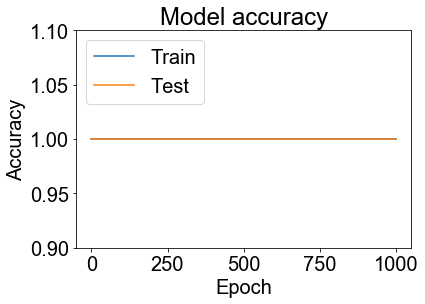

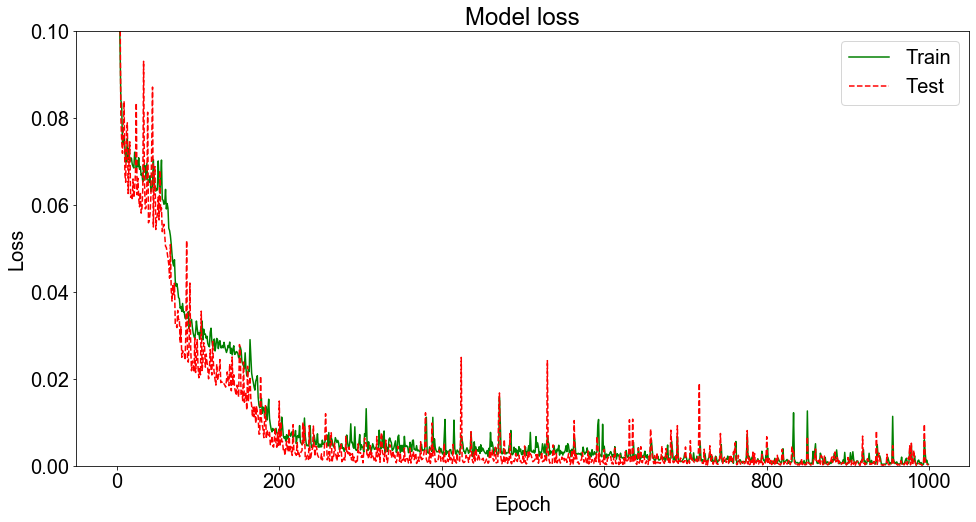

In [12]:
#history1 = model.fit(x_train, y_train, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0.9,1.1)
plt.show()

plt.figure(figsize=(16,8))
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "20"
# Plot training & validation loss values
plt.plot(model.history.history['loss'], 'g')
plt.plot(model.history.history['val_loss'], 'r--')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.ylim(0,0.1)
plt.show()


   #### Example 2. 3-D cube model with unit harmonic load

In [14]:
freq = pd.read_excel('Examples.xlsx', sheet_name="Cube", usecols="A",header=None)
disp= pd.read_excel('Examples.xlsx', sheet_name="Cube", usecols="B:D",header=None)

#print (disp.max())
#print(disp.min())

ind = np.where(disp.iloc[:,0]>8000)[0]

disp = disp.drop(ind)
freq = freq.drop(ind)

#print(len(disp))
#print(len(disp2))



In [15]:
mu_disp = np.mean(disp)
st_disp = np.std(disp)

dispstd = disp
#dispstd = (disp-mu_disp)/st_disp
#dispstd = (disp-disp.min())/(disp.max()-disp.min())
#dispstd = (disp-mu_disp)/(st_disp**2 + .05)

rnd_indices = np.random.rand(len(freq)) < 0.95
#print(len(np.random.rand(len(freq))))
#print(len(disp))

x_train = freq[rnd_indices]
#print(x_train)
y_train = dispstd[rnd_indices]
x_test = freq[~rnd_indices]
#print(x_test)
y_test = dispstd[~rnd_indices]

#print(dispstd.values)

#plt.hist(dispstd, bins=2)
#plt.hist(dispstd)

# plt.figure()
# plt.subplot(2,1,1)
# plt.plot(disp)
# plt.subplot(2,1,2)
# plt.plot(dispstd)
# #print(len(x_train))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 40)                80        
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_11 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 63        
Total params: 1,993
Trainable params: 1,993
Non-trainable params: 0
_________________________________________________________________


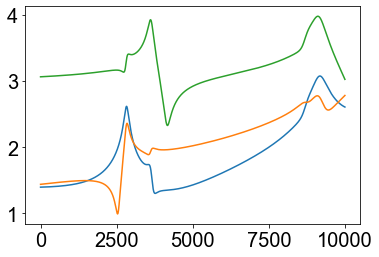

In [16]:
def baseline_model():
    model = Sequential()
    
    model.add(Dense(40, input_dim=1, activation='elu'))
    model.add(Dense(30, activation='elu'))
    model.add(Dense(20, activation='elu'))
    model.add(Dense(3, activation='linear'))
    
    sgd = SGD(lr=0.001, momentum=0.9, nesterov=True)
    model.compile(loss='mse', optimizer="adam", metrics=["acc"])
    return model

v = np.log10(dispstd)
#v = dispstd

# Training the model
model = baseline_model()
model.summary()
plt.plot(v)

In [17]:
# Training the model
model = baseline_model()
#model.fit(x_train, y_train, epochs=500, verbose = 1, validation_data=(x_test,y_test))
#model.fit(freq, v, epochs=100, verbose = 1, validation_data=(x_test,np.log10(y_test)))
model.fit(freq, v, epochs=500, verbose = 1, validation_data=(x_test,np.log10(y_test)))

Train on 10000 samples, validate on 523 samples
Epoch 1/500
10000/10000 [==============================] - 1s 96us/step - loss: 57.1290 - acc: 0.8596 - val_loss: 0.1580 - val_acc: 1.0000
Epoch 2/500
10000/10000 [==============================] - 0s 30us/step - loss: 0.1405 - acc: 1.0000 - val_loss: 0.1151 - val_acc: 1.0000
Epoch 3/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.1107 - acc: 1.0000 - val_loss: 0.1073 - val_acc: 1.0000
Epoch 4/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0999 - acc: 0.9997 - val_loss: 0.0792 - val_acc: 1.0000
Epoch 5/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0929 - acc: 1.0000 - val_loss: 0.0768 - val_acc: 1.0000
Epoch 6/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0881 - acc: 0.9999 - val_loss: 0.0904 - val_acc: 1.0000
Epoch 7/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0931 - acc: 0.9992 - val_loss: 0.0917 - v

10000/10000 [==============================] - 0s 28us/step - loss: 0.0510 - acc: 1.0000 - val_loss: 0.0333 - val_acc: 1.0000
Epoch 60/500
10000/10000 [==============================] - 0s 28us/step - loss: 0.0551 - acc: 0.9973 - val_loss: 0.0463 - val_acc: 1.0000
Epoch 61/500
10000/10000 [==============================] - 0s 30us/step - loss: 0.0462 - acc: 0.9999 - val_loss: 0.0366 - val_acc: 1.0000
Epoch 62/500
10000/10000 [==============================] - 0s 26us/step - loss: 0.0478 - acc: 0.9995 - val_loss: 0.0803 - val_acc: 1.0000
Epoch 63/500
10000/10000 [==============================] - 0s 28us/step - loss: 0.0457 - acc: 1.0000 - val_loss: 0.0310 - val_acc: 1.0000
Epoch 64/500
10000/10000 [==============================] - 0s 29us/step - loss: 0.0538 - acc: 1.0000 - val_loss: 0.0522 - val_acc: 1.0000
Epoch 65/500
10000/10000 [==============================] - 0s 28us/step - loss: 0.0424 - acc: 1.0000 - val_loss: 0.0644 - val_acc: 1.0000
Epoch 66/500
10000/10000 [==============

10000/10000 [==============================] - 0s 27us/step - loss: 0.0263 - acc: 1.0000 - val_loss: 0.0242 - val_acc: 1.0000
Epoch 118/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0248 - acc: 1.0000 - val_loss: 0.0232 - val_acc: 1.0000
Epoch 119/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0267 - acc: 1.0000 - val_loss: 0.0264 - val_acc: 1.0000
Epoch 120/500
10000/10000 [==============================] - 0s 28us/step - loss: 0.0246 - acc: 1.0000 - val_loss: 0.0215 - val_acc: 1.0000
Epoch 121/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0272 - acc: 1.0000 - val_loss: 0.0229 - val_acc: 1.0000
Epoch 122/500
10000/10000 [==============================] - 0s 26us/step - loss: 0.0262 - acc: 1.0000 - val_loss: 0.0236 - val_acc: 1.0000
Epoch 123/500
10000/10000 [==============================] - 0s 26us/step - loss: 0.0269 - acc: 1.0000 - val_loss: 0.0242 - val_acc: 1.0000
Epoch 124/500
10000/10000 [=======

10000/10000 [==============================] - 0s 28us/step - loss: 0.0148 - acc: 1.0000 - val_loss: 0.0136 - val_acc: 1.0000
Epoch 176/500
10000/10000 [==============================] - 0s 28us/step - loss: 0.0139 - acc: 1.0000 - val_loss: 0.0113 - val_acc: 1.0000
Epoch 177/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0132 - acc: 1.0000 - val_loss: 0.0126 - val_acc: 1.0000
Epoch 178/500
10000/10000 [==============================] - 0s 28us/step - loss: 0.0137 - acc: 1.0000 - val_loss: 0.0115 - val_acc: 1.0000
Epoch 179/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0146 - acc: 1.0000 - val_loss: 0.0113 - val_acc: 1.0000
Epoch 180/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0138 - acc: 1.0000 - val_loss: 0.0115 - val_acc: 1.0000
Epoch 181/500
10000/10000 [==============================] - 0s 28us/step - loss: 0.0135 - acc: 1.0000 - val_loss: 0.0131 - val_acc: 1.0000
Epoch 182/500
10000/10000 [=======

10000/10000 [==============================] - 0s 27us/step - loss: 0.0082 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 1.0000
Epoch 234/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0090 - acc: 1.0000 - val_loss: 0.0098 - val_acc: 1.0000
Epoch 235/500
10000/10000 [==============================] - 0s 28us/step - loss: 0.0088 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 1.0000
Epoch 236/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0083 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000
Epoch 237/500
10000/10000 [==============================] - 0s 29us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 1.0000
Epoch 238/500
10000/10000 [==============================] - 0s 28us/step - loss: 0.0082 - acc: 1.0000 - val_loss: 0.0097 - val_acc: 1.0000
Epoch 239/500
10000/10000 [==============================] - 0s 30us/step - loss: 0.0080 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000
Epoch 240/500
10000/10000 [=======

10000/10000 [==============================] - 0s 28us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 292/500
10000/10000 [==============================] - 0s 33us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 293/500
10000/10000 [==============================] - 0s 28us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 294/500
10000/10000 [==============================] - 0s 29us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 295/500
10000/10000 [==============================] - 0s 29us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 296/500
10000/10000 [==============================] - 0s 29us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 297/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 298/500
10000/10000 [=======

10000/10000 [==============================] - 0s 27us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 350/500
10000/10000 [==============================] - 0s 28us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 351/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 352/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 353/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 354/500
10000/10000 [==============================] - 0s 26us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 355/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 356/500
10000/10000 [=======

10000/10000 [==============================] - 0s 28us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 408/500
10000/10000 [==============================] - 0s 28us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 409/500
10000/10000 [==============================] - 0s 28us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 410/500
10000/10000 [==============================] - 0s 28us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 411/500
10000/10000 [==============================] - 0s 28us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 412/500
10000/10000 [==============================] - 0s 28us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 413/500
10000/10000 [==============================] - 0s 28us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 414/500
10000/10000 [=======

10000/10000 [==============================] - 0s 28us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 466/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 467/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 468/500
10000/10000 [==============================] - 0s 28us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 469/500
10000/10000 [==============================] - 0s 27us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 9.9235e-04 - val_acc: 1.0000
Epoch 470/500
10000/10000 [==============================] - 0s 26us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 471/500
10000/10000 [==============================] - 0s 28us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 472/500
10000/10000 [===

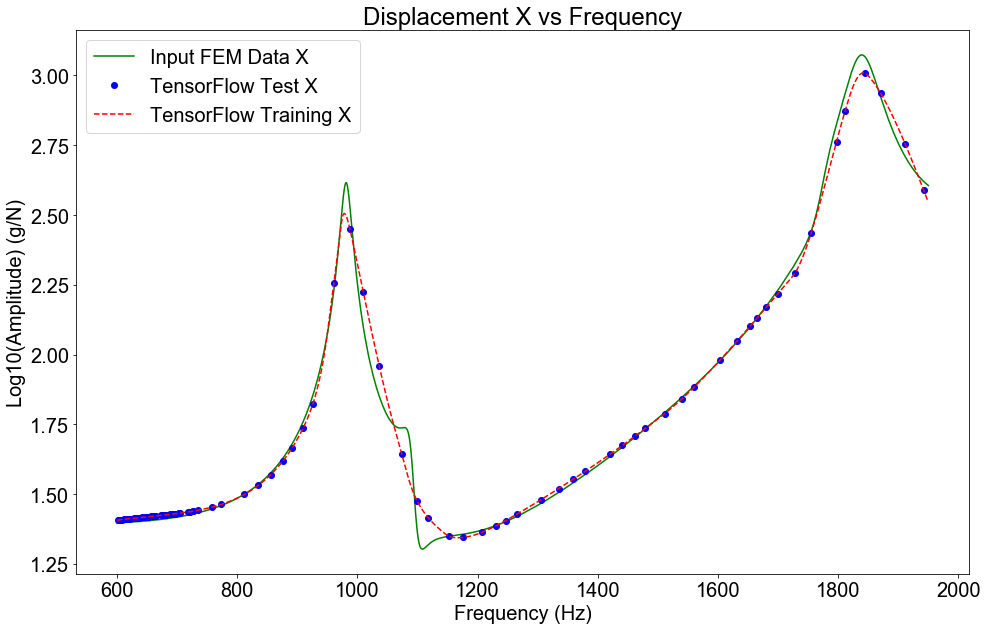

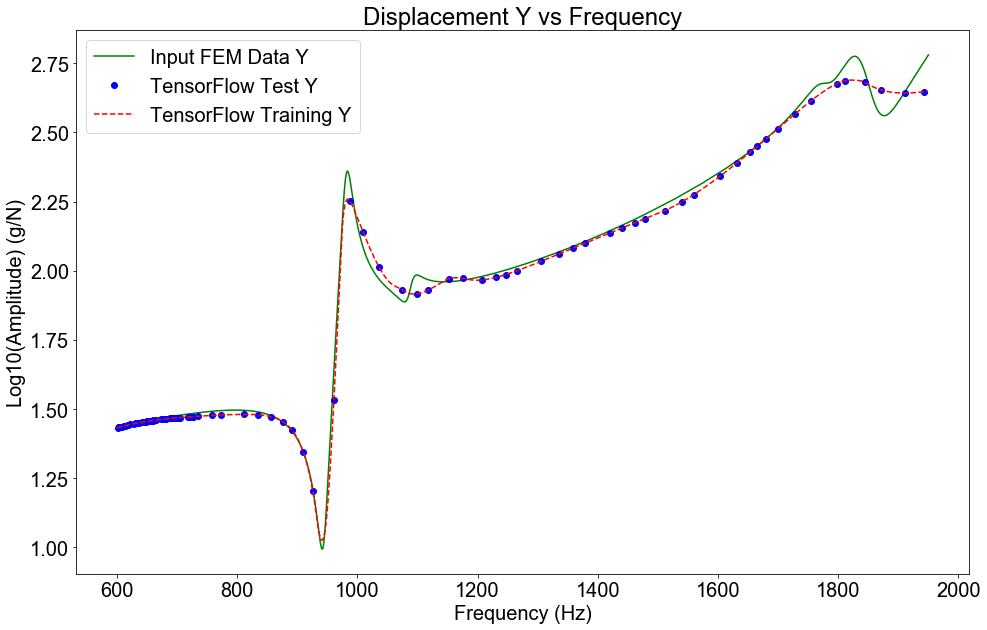

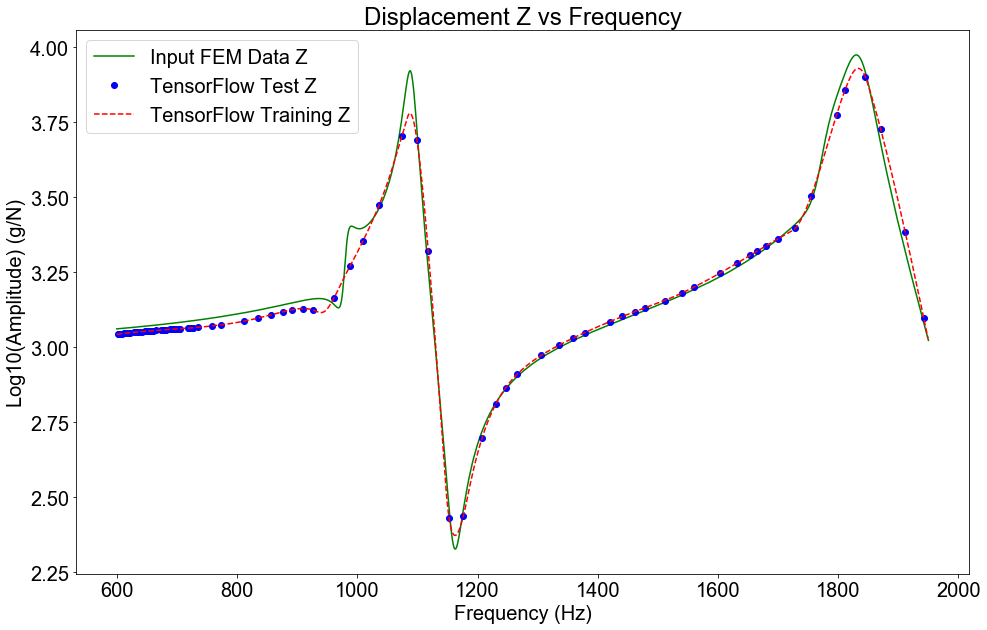

In [18]:
plt.figure(figsize=(16,10))
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "20"

dummy_xtrain1= x_train[0:30:1]
dummy_xtrain2 = x_train[1::10]
dummy_xtrain= np.concatenate((dummy_xtrain1, dummy_xtrain2), axis=None)

dummy_xtest1= x_test[0:50:1]
dummy_xtest2 = x_test[1::10]
dummy_xtest= np.concatenate((dummy_xtest1, dummy_xtest2), axis=None)
#print(dummy_xtest1)

v2=v.to_numpy()
dummy_xtest2=dummy_xtest
dummy_xtrain2=dummy_xtrain
#print(model.predict(dummy_xtest2)[:,1])

plt.plot(freq, v2[:,0], 'g')
plt.plot(dummy_xtest2, model.predict(dummy_xtest2)[:,0], 'ob')
plt.plot(dummy_xtrain2, model.predict(dummy_xtrain2)[:,0], 'r--')

plt.title('Displacement X vs Frequency')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Log10(Amplitude) (g/N)')
plt.legend(['Input FEM Data X',
            'TensorFlow Test X',
            'TensorFlow Training X'])
plt.show()
#########################
plt.figure(figsize=(16,10))
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "20"
plt.plot(freq, v2[:,1], 'g')
plt.plot(dummy_xtest2, model.predict(dummy_xtest2)[:,1], 'ob')
plt.plot(dummy_xtrain2, model.predict(dummy_xtrain2)[:,1], 'r--')

plt.title('Displacement Y vs Frequency')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Log10(Amplitude) (g/N)')
plt.legend(['Input FEM Data Y',
            'TensorFlow Test Y',
            'TensorFlow Training Y'])
plt.show()
####################################
plt.figure(figsize=(16,10))
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "20"
plt.plot(freq, v2[:,2], 'g')
plt.plot(dummy_xtest2, model.predict(dummy_xtest2)[:,2], 'ob')
plt.plot(dummy_xtrain2, model.predict(dummy_xtrain2)[:,2], 'r--')

plt.title('Displacement Z vs Frequency')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Log10(Amplitude) (g/N)')
plt.legend(['Input FEM Data Z',
            'TensorFlow Test Z',
            'TensorFlow Training Z'])
plt.show()


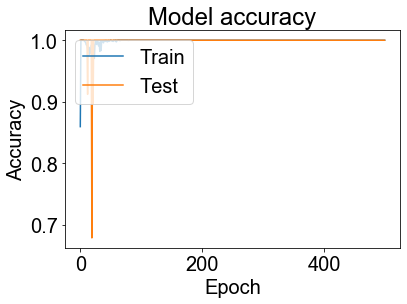

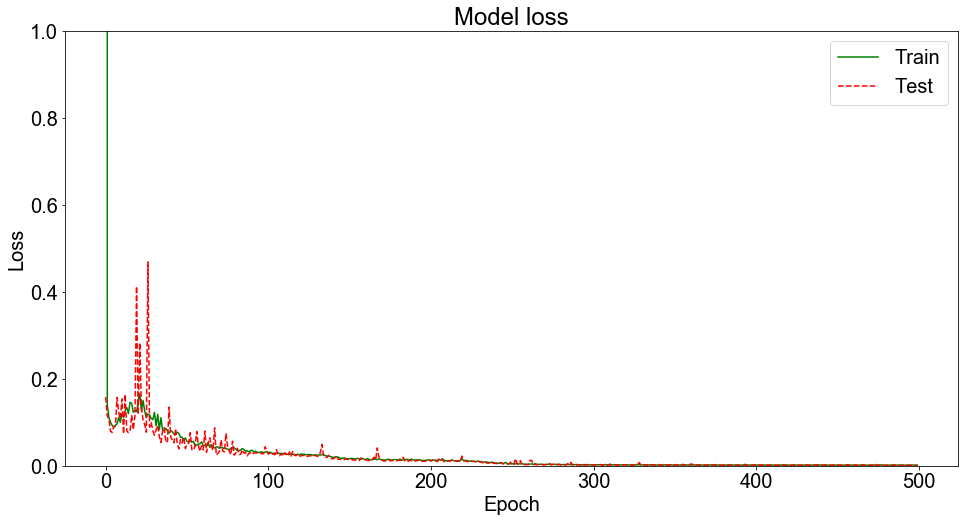

In [19]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.figure(figsize=(16,8))
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "20"
# Plot training & validation loss values
plt.plot(model.history.history['loss'], 'g')
plt.plot(model.history.history['val_loss'], 'r--')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.ylim(0,1)
plt.show()
